In [7]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import mannwhitneyu, normaltest
from statannotations.Annotator import Annotator
import statannot

# Compare DeepCellState variations

In [8]:
import seaborn as sns
sns.set()

In [9]:
res_dcs_noise = pd.read_csv('../results/deepcellstate_results_10kgenes/deepcellstate_allgenes_10foldvalidation_results1000ep_with_noise_10k.csv',index_col=0)
res_dcs_noise['model'] = 'DCS'
res_dcs_nonoise = pd.read_csv('../results/deepcellstate_results_10kgenes/deepcellstate_allgenes_10foldvalidation_results1000ep_no_noise_10k.csv',index_col=0)
res_dcs_nonoise['model'] = 'DCS modified v1'
res_notvae_2encs = pd.read_csv('../results/my_results_10kgenes/allgenes_10foldvalidation_notvae_results1000ep512bs.csv',index_col=0)
res_notvae_2encs['model'] = 'similarity-trained Autoencoders'
res_dcs_direct = pd.read_csv('../results/deepcellstate_results_10kgenes/deepcellstate_allgenes_10foldvalidation_results1000ep_direct_andl2similarity_10k.csv',index_col=0)
res_dcs_direct['model'] = 'DCS modified v2'
baseline = pd.read_csv('../results/baseline_evaluation_allgenes.csv',index_col=0)
baseline = baseline.drop_duplicates()

# add mi
res_mi = pd.read_csv('../results/MI_results/allgenes_10foldvalidation_notpretrained_MIuniform_and_l2sim_2encs_1000ep512bs.csv',index_col=0)
res_mi['model'] = 'InfoMax-based Autoencoders'

In [10]:
# add TransCompRmixedANNS
res_annTransCompR = pd.read_csv('../results/ANNmixedTransCompR_results_10k/allgenes_10foldvalidation_ANNmixedTransCompR_500ep512bs_a375_ht29.csv',index_col=0)
res_annTransCompR['model'] = 'TransCompR-combined and InfoMax-based Autoencoders'

In [11]:
# # add mi
# res_mi = pd.read_csv('../results/MI_results/allgenes_10foldvalidation_notpretrained_MIuniform_and_l2sim_2encs_1000ep512bs_pc3_ha1e.csv',index_col=0)
# res_mi['model'] = 'Translation Model'

# res_mi_class = pd.read_csv('../results/MI_results/allgenes_10foldvalidation_notpretrained_MIuniform_and_l2sim_2encs_2000ep512bs_pc3_ha1e_withclass.csv',index_col=0)
# res_mi_class['model'] = 'Translation Model with classifier'

In [12]:
# res_dcs_noise = pd.read_csv('../results/deepcellstate_results/deepcellstate_landmarks_10foldvalidation_results300ep128bs_withnoise.csv',index_col=0)
# res_dcs_noise['model'] = 'DCS'
# res_dcs_nonoise = pd.read_csv('../results/deepcellstate_results/deepcellstate_landmarks_10foldvalidation_results300ep128bs_no_noise.csv',index_col=0)
# res_dcs_nonoise['model'] = 'DCS modified v1'
# res_notvae_2encs = pd.read_csv('../results/my_results/landmarks_10foldvalidation_vae_results1000ep512bs.csv',index_col=0)
# res_notvae_2encs['model'] = 'Two Autoencoders'
# res_dcs_direct = pd.read_csv('../results/deepcellstate_results/deepcellstate_landmarks_10foldvalidation_results300ep128bs_direct_and_l2similarity.csv',index_col=0)
# res_dcs_direct['model'] = 'DCS modified v2'
# baseline = pd.read_csv('../results/baseline_evaluation_landmarks.csv',index_col=0)
# baseline = baseline.drop_duplicates()

# # # add mi
# # res_mi = pd.read_csv('../results/MI_results/landmarks_10foldvalidation_pretrained_MIuniform_and_l2sim_2encs_1000ep512bs.csv',index_col=0)
# # res_mi['model'] = 'MI Autoencoders'

In [13]:
results = pd.concat([res_dcs_noise,res_dcs_nonoise,res_notvae_2encs,res_dcs_direct,res_mi,res_annTransCompR],axis=0)
results

,model_pearsonHT29,model_pearsonA375,model_spearHT29,model_spearA375,model_accHT29,model_accA375,recon_pear_ht29,recon_pear_a375,recon_spear_ht29,recon_spear_a375,recon_acc_ht29,recon_acc_a375,cross_corr_ht29,cross_corr_a375,Direct_pearson,Direct_spearman,DirectAcc_ht29,DirectAcc_a375,model
0,0.613718,0.599170,0.526330,0.512294,0.685056,0.680166,0.947445,0.944607,0.937704,0.931870,0.896936,0.891681,0.920867,0.920973,0.491287,0.213417,0.642906,0.642906,DCS
1,0.566115,0.558736,0.464582,0.463245,0.663853,0.665333,0.945406,0.942046,0.934308,0.929751,0.894100,0.889458,0.915497,0.915471,0.449773,0.484918,0.631011,0.631011,DCS
2,0.609149,0.582151,0.492402,0.473071,0.667321,0.661947,0.942116,0.947642,0.933452,0.935973,0.893411,0.894833,0.911275,0.915116,0.467521,0.225109,0.626187,0.626187,DCS
3,0.530387,0.514541,0.418556,0.411831,0.646344,0.644403,0.944477,0.941711,0.933683,0.929063,0.894614,0.889775,0.913457,0.919640,0.420189,0.132573,0.617286,0.617286,DCS
4,0.649465,0.635018,0.522971,0.505391,0.686253,0.680406,0.950940,0.945411,0.942423,0.933031,0.903572,0.894141,0.923569,0.925903,0.534992,0.588160,0.646800,0.646800,DCS
5,0.517710,0.500510,0.456342,0.436321,0.659744,0.653069,0.952127,0.946220,0.942698,0.937022,0.903724,0.896427,0.915390,0.922801,0.414236,0.500197,0.626274,0.626274,DCS
6,0.379070,0.377209,0.345177,0.332456,0.616173,0.611459,0.947209,0.943144,0.939710,0.932478,0.900714,0.891758,0.918249,0.919547,0.305874,0.156733,0.590469,0.590469,DCS
7,0.565623,0.548966,0.465607,0.445844,0.665412,0.657116,0.951822,0.941229,0.944159,0.933005,0.905886,0.893113,0.916835,0.922630,0.453185,0.515452,0.629866,0.629866,DCS
8,0.390222,0.374094,0.324936,0.311553,0.606323,0.601103,0.946720,0.943884,0.939709,0.935252,0.901069,0.895268,0.913029,0.914657,0.301552,0.143882,0.581630,0.581630,DCS
9,0.470474,0.465445,0.379353,0.370936,0.630049,0.627560,0.944046,0.940707,0.935589,0.932645,0.895927,0.893243,0.918858,0.917644,0.381603,0.261180,0.603909,0.603909,DCS


## A375 trasnlation

In [14]:
res_to_a375 = results.loc[:,['model_pearsonA375','model_spearA375','model_accA375','model']]
res_to_a375.columns = ['pearson','spearman','accuracy','model']
res_baseline = baseline.loc[:,['Direct_pearson','Direct_spearman','DirectAcc_a375']]
res_baseline['model'] = 'direct translation'
res_baseline.columns = ['pearson','spearman','accuracy','model']
res_to_a375 = pd.concat([res_to_a375,res_baseline],axis=0)
res_to_a375

,pearson,spearman,accuracy,model
0,0.599170,0.512294,0.680166,DCS
1,0.558736,0.463245,0.665333,DCS
2,0.582151,0.473071,0.661947,DCS
3,0.514541,0.411831,0.644403,DCS
4,0.635018,0.505391,0.680406,DCS
...,...,...,...,...
5,0.414236,0.365071,0.626368,direct translation
6,0.305874,0.271386,0.590569,direct translation
7,0.453185,0.369136,0.629967,direct translation
8,0.301552,0.254713,0.581735,direct translation


In [15]:
res_to_a375 = pd.melt(res_to_a375,id_vars=['model'])
res_to_a375.columns = ['model','metric','value']
res_to_a375

,model,metric,value
0,DCS,pearson,0.599170
1,DCS,pearson,0.558736
2,DCS,pearson,0.582151
3,DCS,pearson,0.514541
4,DCS,pearson,0.635018
...,...,...,...
205,direct translation,accuracy,0.626368
206,direct translation,accuracy,0.590569
207,direct translation,accuracy,0.629967
208,direct translation,accuracy,0.581735


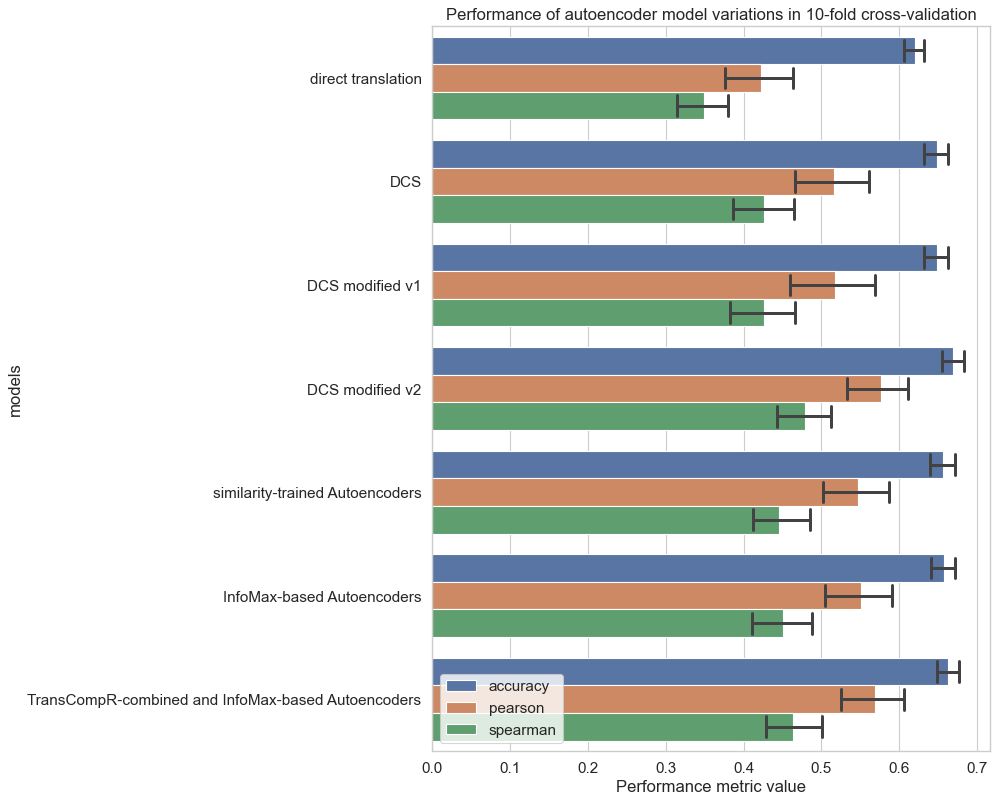

In [16]:
sns.set_theme(style="whitegrid",font_scale = 1.25)
plt.figure(figsize=(9,12), dpi= 80)
ax = sns.barplot(x="value", y="model", data=res_to_a375,
            order=['direct translation','DCS',
                   'DCS modified v1','DCS modified v2',
                   'similarity-trained Autoencoders','InfoMax-based Autoencoders',
                   'TransCompR-combined and InfoMax-based Autoencoders'],
            hue_order = ['accuracy','pearson','spearman'],
            hue="metric",ci=95,capsize=0.2,orient='h')
plt.legend(loc='lower left')
plt.gca().set(title='Performance of autoencoder model variations in 10-fold cross-validation', 
              xlabel = 'Performance metric value',
              ylabel='models')
# statannot.add_stat_annotation(ax=ax, 
#                               data=res_to_a375,
#                               y="value",
#                               x="model",
#                               order=['direct translation','DCS',
#                                      'DCS modified v1','DCS modified v2',
#                                      'similarity-trained Autoencoders','GAN-based Autoencoders',
#                                      'TransCompR-combined and GAN-based Autoencoders'],
#                               hue_order = ['accuracy','pearson','spearman'],
#                               hue="metric",
#                               box_pairs=[
#                                   (("DCS", "pearson"), ("similarity-trained Autoencoders","pearson"))],
#                               test="Mann-Whitney",
#                               loc = 'inside',
#                               verbose=0
#                              )
plt.savefig('../figures/MI_results/allgenes_autoencoders_compare_allgenes_a375.png', bbox_inches='tight',dpi=600)

In [17]:
from scipy import stats

In [18]:
models = ['DCS','DCS modified v1','DCS modified v2','similarity-trained Autoencoders',
          'direct translation','InfoMax-based Autoencoders',
          'TransCompR-combined and InfoMax-based Autoencoders']
pvalues_pearson = np.zeros((len(models),len(models)))
pvalues_pearson = pd.DataFrame(pvalues_pearson)
pvalues_pearson.index = models
pvalues_pearson.columns = models
for i in range(len(models)):
    for j in range(i,len(models)):
        m1 = models[i]
        m2 = models[j]
        x1 = res_to_a375[res_to_a375['model']==m1][res_to_a375['metric']=='pearson'].value.values
        x2 = res_to_a375[res_to_a375['model']==m2][res_to_a375['metric']=='pearson'].value.values
        pvalues_pearson.loc[m1,m2] = stats.mannwhitneyu(x1,x2)[1]
pvalues_pearson['metric'] = 'pearson'

<ipython-input-18-b63209060681>:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x1 = res_to_a375[res_to_a375['model']==m1][res_to_a375['metric']=='pearson'].value.values
<ipython-input-18-b63209060681>:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x2 = res_to_a375[res_to_a375['model']==m2][res_to_a375['metric']=='pearson'].value.values


In [19]:
pvalues_spearman = np.zeros((len(models),len(models)))
pvalues_spearman = pd.DataFrame(pvalues_spearman)
pvalues_spearman.index = models
pvalues_spearman.columns = models
for i in range(len(models)):
    for j in range(i,len(models)):
        m1 = models[i]
        m2 = models[j]
        x1 = res_to_a375[res_to_a375['model']==m1][res_to_a375['metric']=='spearman'].value.values
        x2 = res_to_a375[res_to_a375['model']==m2][res_to_a375['metric']=='spearman'].value.values
        pvalues_spearman.loc[m1,m2] = stats.mannwhitneyu(x1,x2)[1]
pvalues_spearman['metric'] = 'spearman'

<ipython-input-19-2bb75a293747>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x1 = res_to_a375[res_to_a375['model']==m1][res_to_a375['metric']=='spearman'].value.values
<ipython-input-19-2bb75a293747>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x2 = res_to_a375[res_to_a375['model']==m2][res_to_a375['metric']=='spearman'].value.values


In [20]:
pvalues_accuracy = np.zeros((len(models),len(models)))
pvalues_accuracy = pd.DataFrame(pvalues_accuracy)
pvalues_accuracy.index = models
pvalues_accuracy.columns = models
for i in range(len(models)):
    for j in range(i,len(models)):
        m1 = models[i]
        m2 = models[j]
        x1 = res_to_a375[res_to_a375['model']==m1][res_to_a375['metric']=='accuracy'].value.values
        x2 = res_to_a375[res_to_a375['model']==m2][res_to_a375['metric']=='accuracy'].value.values
        pvalues_accuracy.loc[m1,m2] = stats.mannwhitneyu(x1,x2)[1]
pvalues_accuracy['metric'] = 'accuracy'

<ipython-input-20-748d6dd7cfa5>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x1 = res_to_a375[res_to_a375['model']==m1][res_to_a375['metric']=='accuracy'].value.values
<ipython-input-20-748d6dd7cfa5>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x2 = res_to_a375[res_to_a375['model']==m2][res_to_a375['metric']=='accuracy'].value.values


In [21]:
a375_translate = pd.concat([pvalues_pearson,pvalues_spearman,pvalues_accuracy],axis=0)
a375_translate = a375_translate[['metric','DCS','DCS modified v1','DCS modified v2','similarity-trained Autoencoders','direct translation','InfoMax-based Autoencoders','TransCompR-combined and InfoMax-based Autoencoders']]
a375_translate.to_csv('../results/MI_results/allgenes_a375_autoencoders_comparison_allgenes_translation_pvalues_table.csv')
a375_translate

,metric,DCS,DCS modified v1,DCS modified v2,similarity-trained Autoencoders,direct translation,InfoMax-based Autoencoders,TransCompR-combined and InfoMax-based Autoencoders
DCS,pearson,1.0,0.850107,0.075662,0.384673,0.031209,0.273036,0.185877
DCS modified v1,pearson,0.0,1.000000,0.104110,0.520523,0.031209,0.384673,0.212294
DCS modified v2,pearson,0.0,0.000000,1.000000,0.241322,0.001315,0.344704,0.570750
similarity-trained Autoencoders,pearson,0.0,0.000000,0.000000,1.000000,0.003611,0.733730,0.384673
direct translation,pearson,0.0,0.000000,0.000000,0.000000,1.000000,0.005795,0.001315
InfoMax-based Autoencoders,pearson,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.570750
TransCompR-combined and InfoMax-based Autoencoders,pearson,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
DCS,spearman,1.0,1.000000,0.088973,0.623176,0.025748,0.472676,0.307489
DCS modified v1,spearman,0.0,1.000000,0.104110,0.677585,0.025748,0.520523,0.307489
DCS modified v2,spearman,0.0,0.000000,1.000000,0.212294,0.001008,0.307489,0.427355


### Same but for reconstruction

In [22]:
res_recon_a375 = results.loc[:,['recon_pear_a375','recon_spear_a375','recon_acc_a375','model']]
res_recon_a375.columns = ['pearson','spearman','accuracy','model']
res_recon_a375

,pearson,spearman,accuracy,model
0,0.944607,0.931870,0.891681,DCS
1,0.942046,0.929751,0.889458,DCS
2,0.947642,0.935973,0.894833,DCS
3,0.941711,0.929063,0.889775,DCS
4,0.945411,0.933031,0.894141,DCS
5,0.946220,0.937022,0.896427,DCS
6,0.943144,0.932478,0.891758,DCS
7,0.941229,0.933005,0.893113,DCS
8,0.943884,0.935252,0.895268,DCS
9,0.940707,0.932645,0.893243,DCS


In [23]:
res_recon_a375 = pd.melt(res_recon_a375,id_vars=['model'])
res_recon_a375.columns = ['model','metric','value']
res_recon_a375

,model,metric,value
0,DCS,pearson,0.944607
1,DCS,pearson,0.942046
2,DCS,pearson,0.947642
3,DCS,pearson,0.941711
4,DCS,pearson,0.945411
...,...,...,...
175,TransCompR-combined and InfoMax-based Autoenco...,accuracy,0.841472
176,TransCompR-combined and InfoMax-based Autoenco...,accuracy,0.835253
177,TransCompR-combined and InfoMax-based Autoenco...,accuracy,0.832483
178,TransCompR-combined and InfoMax-based Autoenco...,accuracy,0.836843


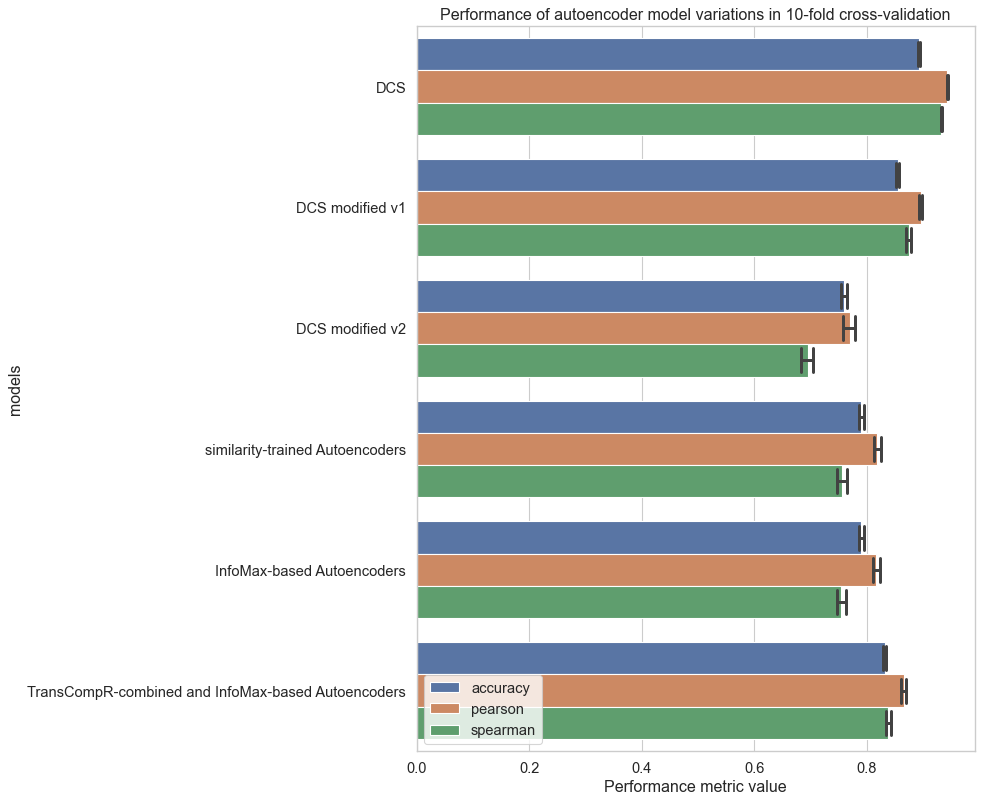

In [24]:
sns.set_theme(style="whitegrid",font_scale = 1.2)
plt.figure(figsize=(9,12), dpi= 80)
ax = sns.barplot(x="value", y="model", data=res_recon_a375,
            order=['DCS',
                   'DCS modified v1','DCS modified v2',
                   'similarity-trained Autoencoders','InfoMax-based Autoencoders',
                   'TransCompR-combined and InfoMax-based Autoencoders'],
            hue_order = ['accuracy','pearson','spearman'],
            hue="metric",ci=95,capsize=0.2,orient='h')
plt.legend(loc='lower left')
plt.gca().set(title='Performance of autoencoder model variations in 10-fold cross-validation', 
              xlabel = 'Performance metric value',
              ylabel='models')
#plt.xticks(rotation=45)
#plt.ylim(0,1.0)
plt.savefig('../figures/MI_results/allgenes_10fold_validation_reconstruction_autoencoders_comparison_allgenes_a375.png', bbox_inches='tight',dpi=600)

In [25]:
models = ['DCS','DCS modified v1','DCS modified v2','similarity-trained Autoencoders','InfoMax-based Autoencoders','TransCompR-combined and InfoMax-based Autoencoders']
pvalues_pearson = np.zeros((len(models),len(models)))
pvalues_pearson = pd.DataFrame(pvalues_pearson)
pvalues_pearson.index = models
pvalues_pearson.columns = models
for i in range(len(models)):
    for j in range(i,len(models)):
        m1 = models[i]
        m2 = models[j]
        x1 = res_to_a375[res_to_a375['model']==m1][res_to_a375['metric']=='pearson'].value.values
        x2 = res_to_a375[res_to_a375['model']==m2][res_to_a375['metric']=='pearson'].value.values
        pvalues_pearson.loc[m1,m2] = stats.mannwhitneyu(x1,x2)[1]
pvalues_pearson['metric'] = 'pearson'

<ipython-input-25-24f92d05a7d3>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x1 = res_to_a375[res_to_a375['model']==m1][res_to_a375['metric']=='pearson'].value.values
<ipython-input-25-24f92d05a7d3>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x2 = res_to_a375[res_to_a375['model']==m2][res_to_a375['metric']=='pearson'].value.values


In [26]:
pvalues_spearman = np.zeros((len(models),len(models)))
pvalues_spearman = pd.DataFrame(pvalues_spearman)
pvalues_spearman.index = models
pvalues_spearman.columns = models
for i in range(len(models)):
    for j in range(i,len(models)):
        m1 = models[i]
        m2 = models[j]
        x1 = res_recon_a375[res_recon_a375['model']==m1][res_recon_a375['metric']=='spearman'].value.values
        x2 = res_recon_a375[res_recon_a375['model']==m2][res_recon_a375['metric']=='spearman'].value.values
        pvalues_spearman.loc[m1,m2] = stats.mannwhitneyu(x1,x2)[1]
pvalues_spearman['metric'] = 'spearman'

<ipython-input-26-db2d8645d6f5>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x1 = res_recon_a375[res_recon_a375['model']==m1][res_recon_a375['metric']=='spearman'].value.values
<ipython-input-26-db2d8645d6f5>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x2 = res_recon_a375[res_recon_a375['model']==m2][res_recon_a375['metric']=='spearman'].value.values


In [27]:
pvalues_accuracy = np.zeros((len(models),len(models)))
pvalues_accuracy = pd.DataFrame(pvalues_accuracy)
pvalues_accuracy.index = models
pvalues_accuracy.columns = models
for i in range(len(models)):
    for j in range(i,len(models)):
        m1 = models[i]
        m2 = models[j]
        x1 = res_recon_a375[res_recon_a375['model']==m1][res_recon_a375['metric']=='accuracy'].value.values
        x2 = res_recon_a375[res_recon_a375['model']==m2][res_recon_a375['metric']=='accuracy'].value.values
        pvalues_accuracy.loc[m1,m2] = stats.mannwhitneyu(x1,x2)[1]
pvalues_accuracy['metric'] = 'accuracy'

<ipython-input-27-7bf8ce6c3d50>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x1 = res_recon_a375[res_recon_a375['model']==m1][res_recon_a375['metric']=='accuracy'].value.values
<ipython-input-27-7bf8ce6c3d50>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x2 = res_recon_a375[res_recon_a375['model']==m2][res_recon_a375['metric']=='accuracy'].value.values


In [28]:
a375_reconstruction = pd.concat([pvalues_pearson,pvalues_spearman,pvalues_accuracy],axis=0)
a375_reconstruction = a375_reconstruction[['metric','DCS','DCS modified v1','DCS modified v2','similarity-trained Autoencoders','InfoMax-based Autoencoders','TransCompR-combined and InfoMax-based Autoencoders']]
a375_reconstruction.to_csv('../results/MI_results/allgenes_a375_autoencoders_comparison_allgenes_reconstruction_pvalues_table.csv')
a375_reconstruction

,metric,DCS,DCS modified v1,DCS modified v2,similarity-trained Autoencoders,InfoMax-based Autoencoders,TransCompR-combined and InfoMax-based Autoencoders
DCS,pearson,1.0,0.850107,0.075662,0.384673,0.273036,0.185877
DCS modified v1,pearson,0.0,1.000000,0.104110,0.520523,0.384673,0.212294
DCS modified v2,pearson,0.0,0.000000,1.000000,0.241322,0.344704,0.570750
similarity-trained Autoencoders,pearson,0.0,0.000000,0.000000,1.000000,0.733730,0.384673
InfoMax-based Autoencoders,pearson,0.0,0.000000,0.000000,0.000000,1.000000,0.570750
TransCompR-combined and InfoMax-based Autoencoders,pearson,0.0,0.000000,0.000000,0.000000,0.000000,1.000000
DCS,spearman,1.0,0.000183,0.000183,0.000183,0.000183,0.000183
DCS modified v1,spearman,0.0,1.000000,0.000183,0.000183,0.000183,0.000183
DCS modified v2,spearman,0.0,0.000000,1.000000,0.000183,0.000183,0.000183
similarity-trained Autoencoders,spearman,0.0,0.000000,0.000000,1.000000,0.909722,0.000183


## HT29 trasnlation

In [29]:
res_to_ht29 = results.loc[:,['model_pearsonHT29','model_spearHT29','model_accHT29','model']]
res_to_ht29.columns = ['pearson','spearman','accuracy','model']
res_baseline = baseline.loc[:,['Direct_pearson','Direct_spearman','DirectAcc_ht29']]
res_baseline['model'] = 'direct translation'
res_baseline.columns = ['pearson','spearman','accuracy','model']
res_to_ht29 = pd.concat([res_to_ht29,res_baseline],axis=0)
res_to_ht29

,pearson,spearman,accuracy,model
0,0.613718,0.526330,0.685056,DCS
1,0.566115,0.464582,0.663853,DCS
2,0.609149,0.492402,0.667321,DCS
3,0.530387,0.418556,0.646344,DCS
4,0.649465,0.522971,0.686253,DCS
...,...,...,...,...
5,0.414236,0.365071,0.626368,direct translation
6,0.305874,0.271386,0.590569,direct translation
7,0.453185,0.369136,0.629967,direct translation
8,0.301552,0.254713,0.581735,direct translation


In [30]:
res_to_ht29 = pd.melt(res_to_ht29,id_vars=['model'])
res_to_ht29.columns = ['model','metric','value']
res_to_ht29

,model,metric,value
0,DCS,pearson,0.613718
1,DCS,pearson,0.566115
2,DCS,pearson,0.609149
3,DCS,pearson,0.530387
4,DCS,pearson,0.649465
...,...,...,...
205,direct translation,accuracy,0.626368
206,direct translation,accuracy,0.590569
207,direct translation,accuracy,0.629967
208,direct translation,accuracy,0.581735


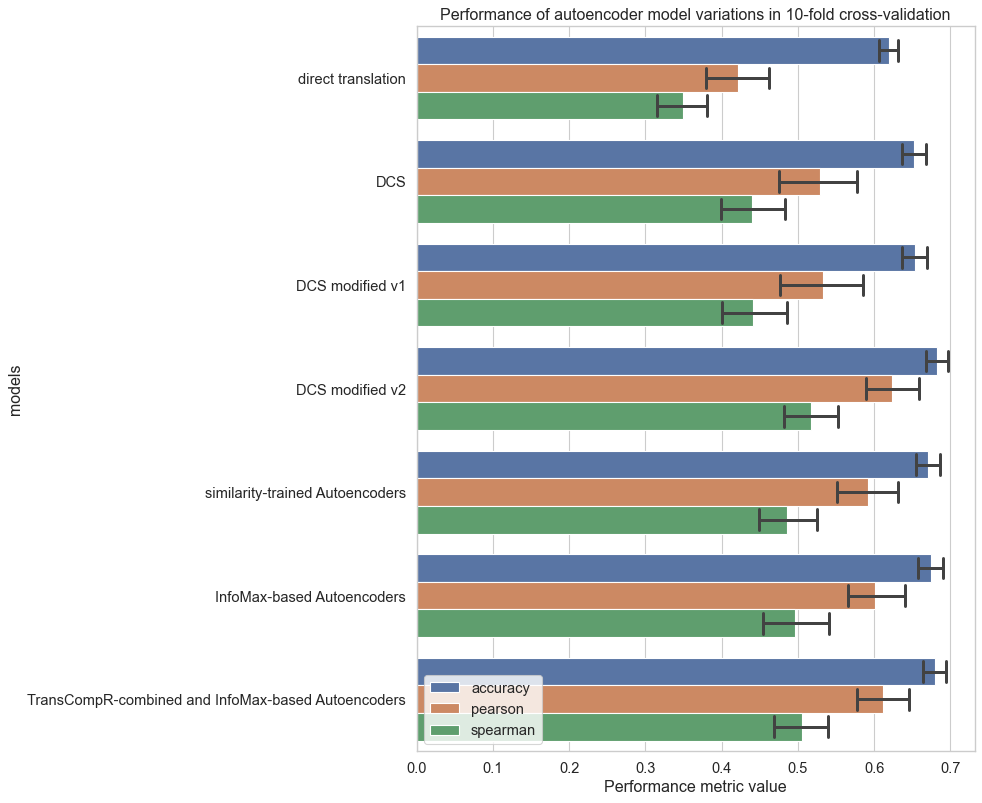

In [31]:
sns.set_theme(style="whitegrid",font_scale = 1.2)
plt.figure(figsize=(9,12), dpi= 80)
ax = sns.barplot(x="value", y="model", data=res_to_ht29,
            order=['direct translation','DCS',
                   'DCS modified v1','DCS modified v2',
                   'similarity-trained Autoencoders','InfoMax-based Autoencoders',
                   'TransCompR-combined and InfoMax-based Autoencoders'],
            hue_order = ['accuracy','pearson','spearman'],
            hue="metric",ci=95,capsize=0.2,orient='h')
plt.legend(loc='lower left')
plt.gca().set(title='Performance of autoencoder model variations in 10-fold cross-validation', 
              xlabel = 'Performance metric value',
              ylabel='models')
#plt.xticks(rotation=45)
#plt.ylim(0,1.0)
plt.savefig('../figures/MI_results/allgenes_10fold_validation_autoencoders_comparison_allgenes_ht29.png', bbox_inches='tight',dpi=600)

In [33]:
models = ['DCS','DCS modified v1','DCS modified v2','similarity-trained Autoencoders','direct translation','InfoMax-based Autoencoders','TransCompR-combined and InfoMax-based Autoencoders']
pvalues_pearson = np.zeros((len(models),len(models)))
pvalues_pearson = pd.DataFrame(pvalues_pearson)
pvalues_pearson.index = models
pvalues_pearson.columns = models
for i in range(len(models)):
    for j in range(i,len(models)):
        m1 = models[i]
        m2 = models[j]
        x1 = res_to_ht29[res_to_ht29['model']==m1][res_to_ht29['metric']=='pearson'].value.values
        x2 = res_to_ht29[res_to_ht29['model']==m2][res_to_ht29['metric']=='pearson'].value.values
        pvalues_pearson.loc[m1,m2] = stats.mannwhitneyu(x1,x2)[1]
pvalues_pearson['metric'] = 'pearson'

<ipython-input-33-5fcdfe964499>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x1 = res_to_ht29[res_to_ht29['model']==m1][res_to_ht29['metric']=='pearson'].value.values
<ipython-input-33-5fcdfe964499>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x2 = res_to_ht29[res_to_ht29['model']==m2][res_to_ht29['metric']=='pearson'].value.values


In [34]:
pvalues_spearman = np.zeros((len(models),len(models)))
pvalues_spearman = pd.DataFrame(pvalues_spearman)
pvalues_spearman.index = models
pvalues_spearman.columns = models
for i in range(len(models)):
    for j in range(i,len(models)):
        m1 = models[i]
        m2 = models[j]
        x1 = res_to_ht29[res_to_ht29['model']==m1][res_to_ht29['metric']=='spearman'].value.values
        x2 = res_to_ht29[res_to_ht29['model']==m2][res_to_ht29['metric']=='spearman'].value.values
        pvalues_spearman.loc[m1,m2] = stats.mannwhitneyu(x1,x2)[1]
pvalues_spearman['metric'] = 'spearman'

<ipython-input-34-2b2bd44095e3>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x1 = res_to_ht29[res_to_ht29['model']==m1][res_to_ht29['metric']=='spearman'].value.values
<ipython-input-34-2b2bd44095e3>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x2 = res_to_ht29[res_to_ht29['model']==m2][res_to_ht29['metric']=='spearman'].value.values


In [35]:
pvalues_accuracy = np.zeros((len(models),len(models)))
pvalues_accuracy = pd.DataFrame(pvalues_accuracy)
pvalues_accuracy.index = models
pvalues_accuracy.columns = models
for i in range(len(models)):
    for j in range(i,len(models)):
        m1 = models[i]
        m2 = models[j]
        x1 = res_to_ht29[res_to_ht29['model']==m1][res_to_ht29['metric']=='accuracy'].value.values
        x2 = res_to_ht29[res_to_ht29['model']==m2][res_to_ht29['metric']=='accuracy'].value.values
        pvalues_accuracy.loc[m1,m2] = stats.mannwhitneyu(x1,x2)[1]
pvalues_accuracy['metric'] = 'accuracy'

<ipython-input-35-c5c1bf237c12>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x1 = res_to_ht29[res_to_ht29['model']==m1][res_to_ht29['metric']=='accuracy'].value.values
<ipython-input-35-c5c1bf237c12>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x2 = res_to_ht29[res_to_ht29['model']==m2][res_to_ht29['metric']=='accuracy'].value.values


In [36]:
ht29_translate = pd.concat([pvalues_pearson,pvalues_spearman,pvalues_accuracy],axis=0)
ht29_translate = ht29_translate[['metric','DCS','DCS modified v1','DCS modified v2','similarity-trained Autoencoders','direct translation','InfoMax-based Autoencoders','TransCompR-combined and InfoMax-based Autoencoders']]
ht29_translate.to_csv('../results/MI_results/allgenes_ht29_autoencoders_comparison_allgenes_translation_pvalues_table.csv')
ht29_translate

,metric,DCS,DCS modified v1,DCS modified v2,similarity-trained Autoencoders,direct translation,InfoMax-based Autoencoders,TransCompR-combined and InfoMax-based Autoencoders
DCS,pearson,1.0,0.909722,0.021134,0.185877,0.021134,0.075662,0.045155
DCS modified v1,pearson,0.0,1.000000,0.037635,0.185877,0.021134,0.088973,0.088973
DCS modified v2,pearson,0.0,0.000000,1.000000,0.427355,0.000183,0.570750,0.623176
similarity-trained Autoencoders,pearson,0.0,0.000000,0.000000,1.000000,0.000330,0.733730,0.472676
direct translation,pearson,0.0,0.000000,0.000000,0.000000,1.000000,0.000330,0.000330
InfoMax-based Autoencoders,pearson,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.733730
TransCompR-combined and InfoMax-based Autoencoders,pearson,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
DCS,spearman,1.0,0.969850,0.053903,0.212294,0.011330,0.161972,0.064022
DCS modified v1,spearman,0.0,1.000000,0.037635,0.212294,0.011330,0.161972,0.053903
DCS modified v2,spearman,0.0,0.000000,1.000000,0.273036,0.000183,0.384673,0.733730


### Same but for reconstruction

In [37]:
res_recon_ht29 = results.loc[:,['recon_pear_ht29','recon_spear_ht29','recon_acc_ht29','model']]
res_recon_ht29.columns = ['pearson','spearman','accuracy','model']
res_recon_ht29

,pearson,spearman,accuracy,model
0,0.947445,0.937704,0.896936,DCS
1,0.945406,0.934308,0.894100,DCS
2,0.942116,0.933452,0.893411,DCS
3,0.944477,0.933683,0.894614,DCS
4,0.950940,0.942423,0.903572,DCS
5,0.952127,0.942698,0.903724,DCS
6,0.947209,0.939710,0.900714,DCS
7,0.951822,0.944159,0.905886,DCS
8,0.946720,0.939709,0.901069,DCS
9,0.944046,0.935589,0.895927,DCS


In [38]:
res_recon_ht29 = pd.melt(res_recon_ht29,id_vars=['model'])
res_recon_ht29.columns = ['model','metric','value']
res_recon_ht29

,model,metric,value
0,DCS,pearson,0.947445
1,DCS,pearson,0.945406
2,DCS,pearson,0.942116
3,DCS,pearson,0.944477
4,DCS,pearson,0.950940
...,...,...,...
175,TransCompR-combined and InfoMax-based Autoenco...,accuracy,0.847646
176,TransCompR-combined and InfoMax-based Autoenco...,accuracy,0.844256
177,TransCompR-combined and InfoMax-based Autoenco...,accuracy,0.850979
178,TransCompR-combined and InfoMax-based Autoenco...,accuracy,0.845584


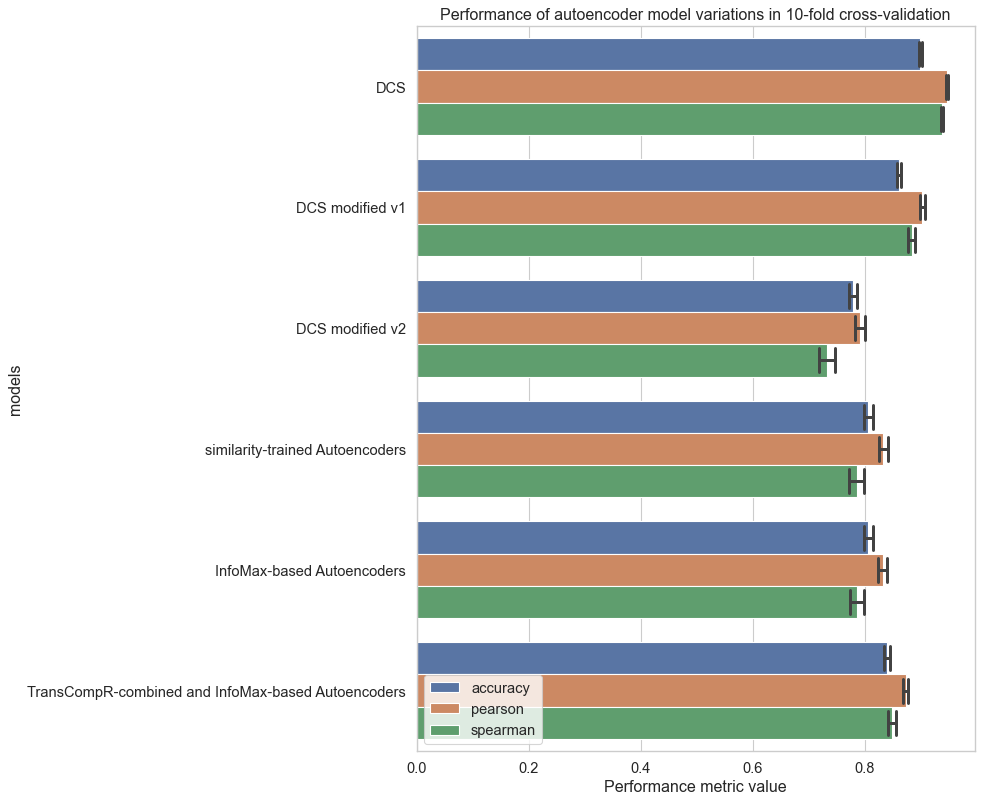

In [39]:
sns.set_theme(style="whitegrid",font_scale = 1.2)
plt.figure(figsize=(9,12), dpi= 80)
ax = sns.barplot(x="value", y="model", data=res_recon_ht29,
            order=['DCS',
                   'DCS modified v1','DCS modified v2',
                   'similarity-trained Autoencoders','InfoMax-based Autoencoders',
                   'TransCompR-combined and InfoMax-based Autoencoders'],
            hue_order = ['accuracy','pearson','spearman'],
            hue="metric",ci=95,capsize=0.2,orient='h')
plt.legend(loc='lower left')
plt.gca().set(title='Performance of autoencoder model variations in 10-fold cross-validation', 
              xlabel = 'Performance metric value',
              ylabel='models')
#plt.xticks(rotation=45)
#plt.ylim(0,1.0)
plt.savefig('../figures/MI_results/allgenes_10fold_validation_reconstruction_autoencoders_comparison_allgenes_ht29.png', bbox_inches='tight',dpi=600)

In [40]:
models = ['DCS','DCS modified v1','DCS modified v2','similarity-trained Autoencoders','InfoMax-based Autoencoders','TransCompR-combined and InfoMax-based Autoencoders']
pvalues_pearson = np.zeros((len(models),len(models)))
pvalues_pearson = pd.DataFrame(pvalues_pearson)
pvalues_pearson.index = models
pvalues_pearson.columns = models
for i in range(len(models)):
    for j in range(i,len(models)):
        m1 = models[i]
        m2 = models[j]
        x1 = res_recon_ht29[res_recon_ht29['model']==m1][res_recon_ht29['metric']=='pearson'].value.values
        x2 = res_recon_ht29[res_recon_ht29['model']==m2][res_recon_ht29['metric']=='pearson'].value.values
        pvalues_pearson.loc[m1,m2] = stats.mannwhitneyu(x1,x2)[1]
pvalues_pearson['metric'] = 'pearson'

<ipython-input-40-c30164c18060>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x1 = res_recon_ht29[res_recon_ht29['model']==m1][res_recon_ht29['metric']=='pearson'].value.values
<ipython-input-40-c30164c18060>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x2 = res_recon_ht29[res_recon_ht29['model']==m2][res_recon_ht29['metric']=='pearson'].value.values


In [41]:
pvalues_spearman = np.zeros((len(models),len(models)))
pvalues_spearman = pd.DataFrame(pvalues_spearman)
pvalues_spearman.index = models
pvalues_spearman.columns = models
for i in range(len(models)):
    for j in range(i,len(models)):
        m1 = models[i]
        m2 = models[j]
        x1 = res_recon_ht29[res_recon_ht29['model']==m1][res_recon_ht29['metric']=='spearman'].value.values
        x2 = res_recon_ht29[res_recon_ht29['model']==m2][res_recon_ht29['metric']=='spearman'].value.values
        pvalues_spearman.loc[m1,m2] = stats.mannwhitneyu(x1,x2)[1]
pvalues_spearman['metric'] = 'spearman'

<ipython-input-41-d8298965d0b4>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x1 = res_recon_ht29[res_recon_ht29['model']==m1][res_recon_ht29['metric']=='spearman'].value.values
<ipython-input-41-d8298965d0b4>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x2 = res_recon_ht29[res_recon_ht29['model']==m2][res_recon_ht29['metric']=='spearman'].value.values


In [42]:
pvalues_accuracy = np.zeros((len(models),len(models)))
pvalues_accuracy = pd.DataFrame(pvalues_accuracy)
pvalues_accuracy.index = models
pvalues_accuracy.columns = models
for i in range(len(models)):
    for j in range(i,len(models)):
        m1 = models[i]
        m2 = models[j]
        x1 = res_recon_ht29[res_recon_ht29['model']==m1][res_recon_ht29['metric']=='accuracy'].value.values
        x2 = res_recon_ht29[res_recon_ht29['model']==m2][res_recon_ht29['metric']=='accuracy'].value.values
        pvalues_accuracy.loc[m1,m2] = stats.mannwhitneyu(x1,x2)[1]
pvalues_accuracy['metric'] = 'accuracy'

<ipython-input-42-12b8fd9ef33b>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x1 = res_recon_ht29[res_recon_ht29['model']==m1][res_recon_ht29['metric']=='accuracy'].value.values
<ipython-input-42-12b8fd9ef33b>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x2 = res_recon_ht29[res_recon_ht29['model']==m2][res_recon_ht29['metric']=='accuracy'].value.values


In [43]:
ht29_reconstruction = pd.concat([pvalues_pearson,pvalues_spearman,pvalues_accuracy],axis=0)
ht29_reconstruction = ht29_reconstruction[['metric','DCS','DCS modified v1','DCS modified v2','similarity-trained Autoencoders','InfoMax-based Autoencoders','TransCompR-combined and InfoMax-based Autoencoders']]
ht29_reconstruction.to_csv('../results/MI_results/allgenes_ht29_autoencoders_comparison_allgenes_reconstruction_pvalues_table.csv')
ht29_reconstruction

,metric,DCS,DCS modified v1,DCS modified v2,similarity-trained Autoencoders,InfoMax-based Autoencoders,TransCompR-combined and InfoMax-based Autoencoders
DCS,pearson,1.0,0.000183,0.000183,0.000183,0.000183,0.000183
DCS modified v1,pearson,0.0,1.000000,0.000183,0.000183,0.000183,0.000183
DCS modified v2,pearson,0.0,0.000000,1.000000,0.000330,0.000440,0.000183
similarity-trained Autoencoders,pearson,0.0,0.000000,0.000000,1.000000,0.909722,0.000183
InfoMax-based Autoencoders,pearson,0.0,0.000000,0.000000,0.000000,1.000000,0.000183
TransCompR-combined and InfoMax-based Autoencoders,pearson,0.0,0.000000,0.000000,0.000000,0.000000,1.000000
DCS,spearman,1.0,0.000183,0.000183,0.000183,0.000183,0.000183
DCS modified v1,spearman,0.0,1.000000,0.000183,0.000183,0.000183,0.000183
DCS modified v2,spearman,0.0,0.000000,1.000000,0.000583,0.000583,0.000183
similarity-trained Autoencoders,spearman,0.0,0.000000,0.000000,1.000000,0.969850,0.000183
